Based on previous trials in prediction, I'm planning to fine tuning the model in this notebook. 

Models:
- AdaBoostRegressor with DecisionTreeRegressor as the base estimator
- RandomForestRegressor
- SVR

In [47]:
random_state=190624

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import itertools
import compose
%matplotlib inline


import sys
import os
sys.path.append(os.path.join(
    os.path.abspath(os.path.pardir), 'src'
))

import nzcompetition
from nzcompetition.preparation import make_prep_pipeline
from nzcompetition.plots import plot_train_pred, plot_pred_distribution

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import (
    Ridge, 
    Lasso, 
    ElasticNet, 
    ElasticNetCV, 
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, 
    AdaBoostRegressor
)
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV
)
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from scipy.stats import (
    randint, 
    expon, 
    reciprocal, 
    uniform
)


y_col = 'performance'
# for plotting
lim=[0, 1.5]

# Data

In [2]:
X_train, y, X_test = nzcompetition.get_raw_data(target=y_col)
X_train, y = nzcompetition.drop_dup(X_train, y)

In [3]:
Xdct = dict.fromkeys(itertools.product(
    # use_seq_mut_feature
    [True, False], 
    # use_seq_prot_feature
    [True, False], 
    # use_org_feature
    [True, False], 
    # max_na_ratio
    [1.0, 0.7, 0.3], 
    # PCA nestimator
    [None, 0.98], 
))

In [4]:
for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    prep_pipe = make_prep_pipeline(seqmut, seqprot, org, naratio)
    X_train_prep = prep_pipe.fit_transform(X_train)
    X_test_prep = prep_pipe.transform(X_test)
    if pca_n_est:
        pca = PCA(pca_n_est)
        X_train_prep = pca.fit_transform(X_train_prep)
        X_test_prep = pca.transform(X_test_prep)
    Xdct[(seqmut, seqprot, org, naratio, pca_n_est)] = (X_train_prep, X_test_prep)


/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(p

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green'

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(p

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(p

/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:246: RuntimeWarning: Mean of empty slice
  protdf['molweight'] = np.nanmean(protdf[['molweight_u', 'molweight_p']], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/numtransform.py:226: RuntimeWarning: Mean of empty slice
  df[newcol] = np.nanmean(df[origcols], axis=1)
/nfs/home/shya/projects/190624_datalyst_competition/src/nzcompetition/transform/seqtransform.py:242: RuntimeWarning: Mean of empty slice
  protdf['pI'] = np.nanmean(protdf[['pI_u', 'pI_p', 'pI_green'

In [15]:
Xdf = pd.DataFrame(Xdct.keys(), columns=[
    'use_seq_mut_feature', 
    'use_seq_prot_feature', 
    'use_org_feature', 
    'max_na_ratio', 
    'pca'
])

Xdf = Xdf.set_index([
    'use_seq_mut_feature', 
    'use_seq_prot_feature', 
    'use_org_feature', 
    'max_na_ratio', 
    'pca'])
for col in ['Adaboost_MSE', 'Randfor_MSE', 'SVR_MSE']:
    Xdf[col] = np.nan

In [85]:
%store Xdct

Stored 'Xdct' (dict)


Now we can use the `seqmut, seqprot, org, naratio, pca_n_est` as key to access the processed training and test data in `Xdct`. And we can store the performance of each model to `Xdf`. 

# AdaBoostRegressor

In [17]:
model_column = 'Adaboost_MSE'
for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    X, _ = Xdct[(seqmut, seqprot, org, naratio, pca_n_est)]
    params = dict(
        base_estimator__max_depth=[3,4,5,6],
        base_estimator__min_samples_leaf=[3,4,5],
        base_estimator__min_samples_split=[3,4,5],
        base_estimator__max_features=['sqrt', 'log2', 0.3, 0.5, 0.7],
        learning_rate=[0.5, 1.0, 1.5]
    )

    grid_search = GridSearchCV(
        AdaBoostRegressor(
            base_estimator=DecisionTreeRegressor(), 
            random_state=random_state,
            n_estimators=50, 
        ), 
        param_grid=params,
        scoring='neg_mean_squared_error', 
        n_jobs=16, 
        cv=8, 
        verbose=0, 
        iid=False, 
    )
    grid_search.fit(X, y)
    print(grid_search.best_params_)
    Xdf.loc[(seqmut, seqprot, org, naratio, pca_n_est), model_column] = grid_search.best_score_ * -1.0

Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    5.5s
[Parallel(n_jobs=16)]: Done 250 tasks      | elapsed:    6.7s
[Parallel(n_jobs=16)]: Done 750 tasks      | elapsed:    9.1s
[Parallel(n_jobs=16)]: Done 1450 tasks      | elapsed:   12.4s
[Parallel(n_jobs=16)]: Done 2350 tasks      | elapsed:   16.9s
[Parallel(n_jobs=16)]: Done 3450 tasks      | elapsed:   22.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   26.9s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.2s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.2s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.2s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.2s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.0s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.2s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.2s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.9s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.5s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.0s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   20.5s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.4s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.3}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.3s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.0s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.5s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.2s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.8s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.4s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.0s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.2s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.9s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.6s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.5s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.9s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.4s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.9s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.8s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.5s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.4s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.2s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.6s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.2s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    9.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   17.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   25.4s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.4s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.5s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    9.3s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   17.7s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   25.5s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.9s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.6s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    1.8s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    5.8s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   10.4s
[Parallel(n_jobs=16)]: Done 2404 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 3504 tasks      | elapsed:   23.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   28.4s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.6s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.6s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    9.0s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.3s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.5s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.9s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.4s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.5s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.6s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.9s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    9.2s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.2s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.1s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.4s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.2s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.9s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.1s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.0s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.3s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.6s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.6s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    9.4s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   17.6s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.7s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.2s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.2s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.2s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.9s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   17.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   25.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.4s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    9.0s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   17.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   25.0s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.6s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.6s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.7s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.3s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   24.0s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.9s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.5s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.1s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.5s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.4s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.8s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.8s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.2s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.7s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.5s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.8s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.6s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   14.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.0s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.2s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.0s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   21.7s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.7s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.2s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.6s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.3}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.1s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.5s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.3s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    7.9s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   15.3s
[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   22.5s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.3}
Fitting 8 folds for each of 540 candidates, totalling 4320 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 576 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 1576 tasks      | elapsed:    8.6s
[Parallel(n_jobs=16)]: Done 2976 tasks      | elapsed:   16.2s


{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 3, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.7}


[Parallel(n_jobs=16)]: Done 4320 out of 4320 | elapsed:   23.6s finished
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


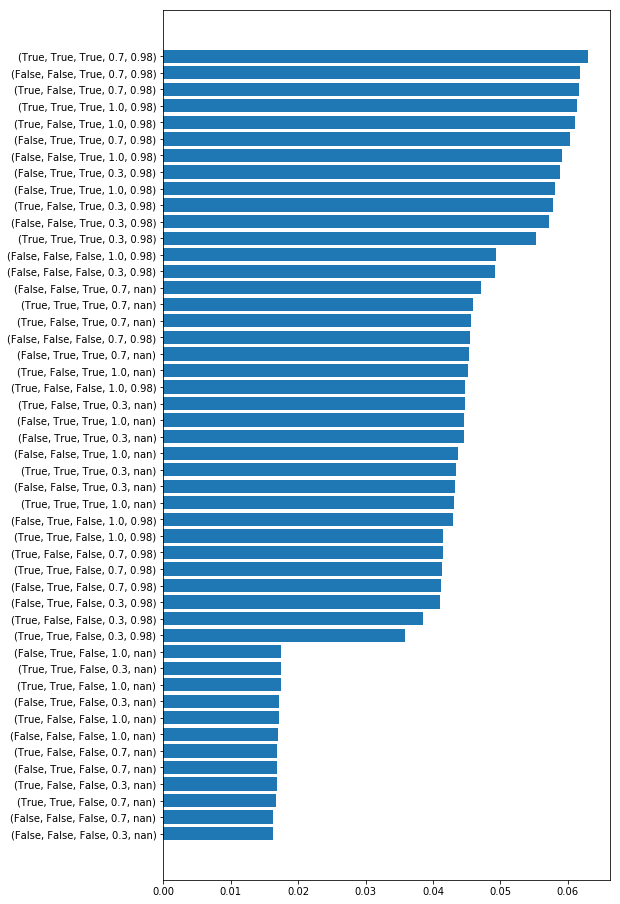

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))

ax.barh(range(Xdf.shape[0]), Xdf[model_column].sort_values())
ax.set_yticks(range(Xdf.shape[0]))
ax.set_yticklabels(Xdf[model_column].sort_values().index)

fig.show()

Thus we know that additional features or PCA are not necessary if we choose AdaBoostRegressor. We'll use the `FFF03N` to denote the preparation pipeline.

Now let's fine tune the model.

In [116]:
X, Xval = Xdct[(False, False, False, 0.3, None)]

In [119]:
param_dist = dict(
    base_estimator__max_depth=randint(3, 6),
    base_estimator__min_samples_leaf=randint(3, 15),
    base_estimator__min_samples_split=randint(4, 15),
    base_estimator__max_features=uniform(0.3, 0.7),
    learning_rate=uniform(0.5, 1)
)

rand_search = RandomizedSearchCV(
    AdaBoostRegressor(
        base_estimator=DecisionTreeRegressor(), 
        random_state=random_state,
        n_estimators=100, 
    ), 
    param_distributions=param_dist, 
    n_iter=10000, 
    scoring='neg_mean_squared_error', 
    n_jobs=10, 
    cv=5, 
    verbose=0, 
    iid=False, 
)

rand_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                                                                                    min_weight_fraction_

In [120]:
print(rand_search.best_params_, rand_search.best_score_)

{'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 8, 'learning_rate': 0.6261716502824434, 'base_estimator__min_samples_split': 5, 'base_estimator__max_features': 0.7550778086449602} -0.014213835180510281


In [69]:
print(grid_search.best_params_, grid_search.best_score_)

{'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 4, 'learning_rate': 1.0, 'base_estimator__min_samples_split': 3, 'base_estimator__max_features': 0.5} -0.016259018961002535


Thus we can call the random searched CV result the best model.

In [121]:
best_ada_CV = rand_search

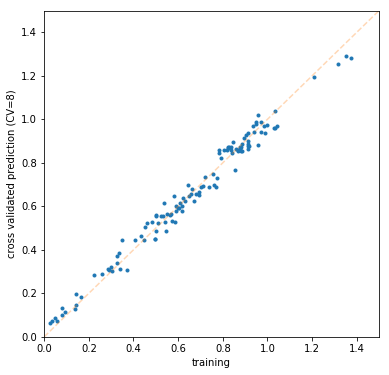

In [122]:
plot_train_pred(y, best_ada_CV.predict(X), lim)

In [123]:
plot_pred_distribution(y, best_ada_CV.predict(X), rand_search.predict(Xval))

There could be some overfitting. We need to regularize the model and check when it will have similar MSE in both training and validation.

Now we save the model and prediction.

In [124]:
pd.DataFrame(
    best_ada_CV.predict(Xval), 
    index=X_test.droplevel('Organism Code').index, 
    columns=['pred'], 
    dtype='float'
).to_csv('../output/performance_FFF03N_adaboost.csv')

In [126]:
joblib.dump(best_ada_CV.best_estimator_, '../models/performance_FFF03N_adaboost.pkl')

['../models/performance_FFF03N_adaboost.pkl']

This model got a MSE 0.012 in validation set.

# RandomForestRegressor

In [91]:
model_column = 'Randfor_MSE'

In [89]:
best_randfor_CV = None
for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    X, _ = Xdct[(seqmut, seqprot, org, naratio, pca_n_est)]
    param = dict(
        max_depth=[3,4,5,6], 
        max_features=['sqrt', 'log2', 'auto', 0.7, 0.9],
        min_samples_leaf=[5,6,7,8]
    )

    grid_search = GridSearchCV(
        RandomForestRegressor(n_estimators=100), 
        param_grid=param,
        scoring='neg_mean_squared_error', 
        n_jobs=16, 
        cv=5, 
        verbose=0, 
        iid=False, 
    )
    grid_search.fit(X, y)

    if best_randfor_CV is None:
        best_randfor_CV = grid_search
    elif best_randfor_CV.best_score_ < grid_search.best_score_:
        best_randfor_CV = grid_search
        
    Xdf.loc[(seqmut, seqprot, org, naratio, pca_n_est), model_column] = grid_search.best_score_ * -1.0

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

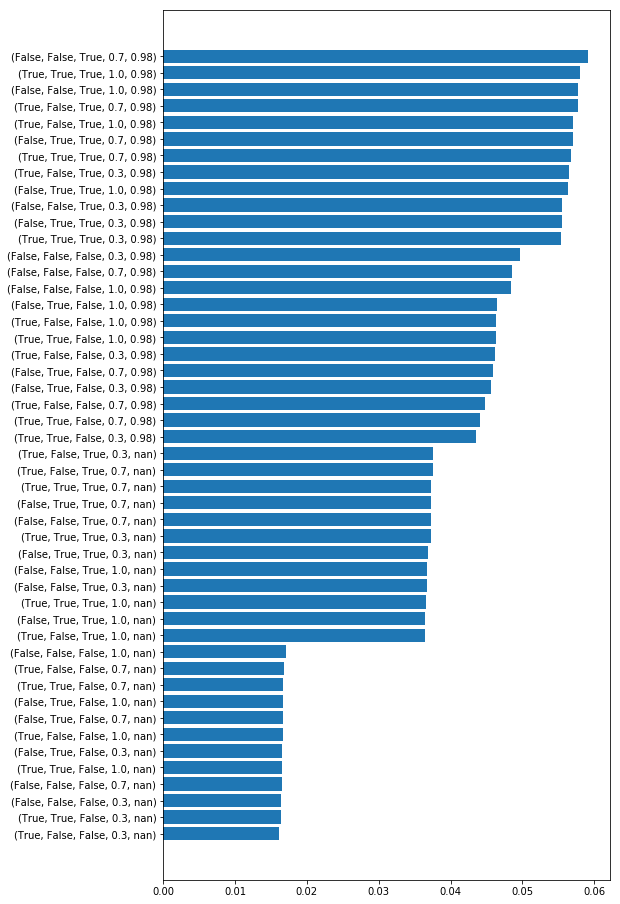

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))

ax.barh(range(Xdf.shape[0]), Xdf[model_column].sort_values())
ax.set_yticks(range(Xdf.shape[0]))
ax.set_yticklabels(Xdf[model_column].sort_values().index)

fig.show()

Now we know the best preparation code for RandomForestRegressor is `TFF03N`.

In [95]:
best_randfor_CV.best_params_

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5}

In [96]:
X, Xval = Xdct[(True, False, False, 0.3, None)]

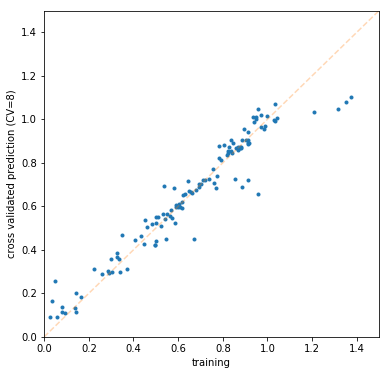

In [98]:
plot_train_pred(y, best_randfor_CV.predict(X), lim)

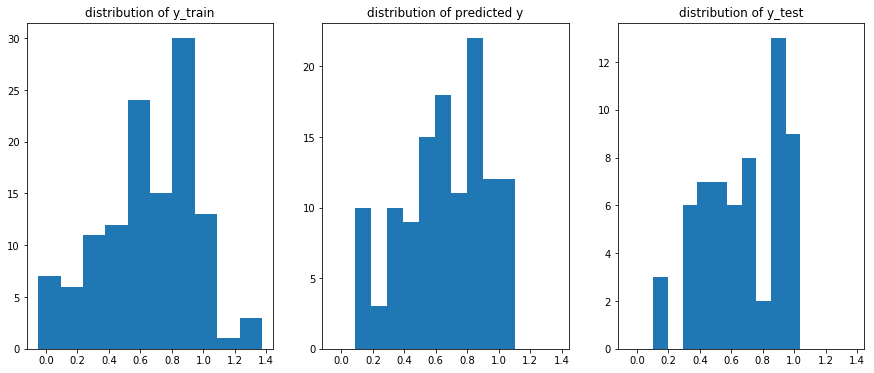

In [99]:
plot_pred_distribution(y, best_randfor_CV.predict(X), best_randfor_CV.predict(Xval))

In [100]:
pd.DataFrame(
    best_randfor_CV.predict(Xval), 
    index=X_test.droplevel('Organism Code').index, 
    columns=['pred'], 
    dtype='float'
).to_csv('../output/performance_TFF03N_randfor.csv')

In [101]:
joblib.dump(best_randfor_CV.best_estimator_, '../models/performance_TFF03N_randfor.pkl')

['../models/performance_TFF03N_randfor.pkl']

This model got a MSE 0.0094 in validation set.

Experience: It is better to find the best feature combination quickly and then fine tune the model, even with RandomizedSearchCV. 

Within RandomizedSearchCV, we should carefully set parameter range and estimate the n_iter. For example, the max_depth should not exceed $log2(number of records)$, which in this case is 7.

Once the hyperparameter ranges are set, we should estimate the n_iter as there could not be sufficient resources for a comprehensive enumeration.

# SVR

In [103]:
model_column = 'SVR_MSE'

best_svr_CV = None
for seqmut, seqprot, org, naratio, pca_n_est in Xdct.keys():
    X, _ = Xdct[(seqmut, seqprot, org, naratio, pca_n_est)]
    param = dict(
        kernel=['rbf', 'linear', 'sigmoid'], 
        gamma=['auto', 0.01, 0.03, 0.1, 0.3, 1, 3], 
        C=[0.01, 0.03, 0.1, 1, 3, 10], 
        epsilon=[0.01, 0.03, 0.1, 0.3, 0.5]
    )

    grid_search = GridSearchCV(
        SVR(), 
        param_grid=param,
        scoring='neg_mean_squared_error', 
        n_jobs=16, 
        cv=5, 
        verbose=0, 
        iid=False, 
    )
    grid_search.fit(X, y)

    if best_svr_CV is None:
        best_svr_CV = grid_search
    elif best_svr_CV.best_score_ < grid_search.best_score_:
        best_svr_CV = grid_search
        
    Xdf.loc[(seqmut, seqprot, org, naratio, pca_n_est), model_column] = grid_search.best_score_ * -1.0

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/z/datalake/virtual_envs/current/Ubuntu16.04/lib/python3.5/site-

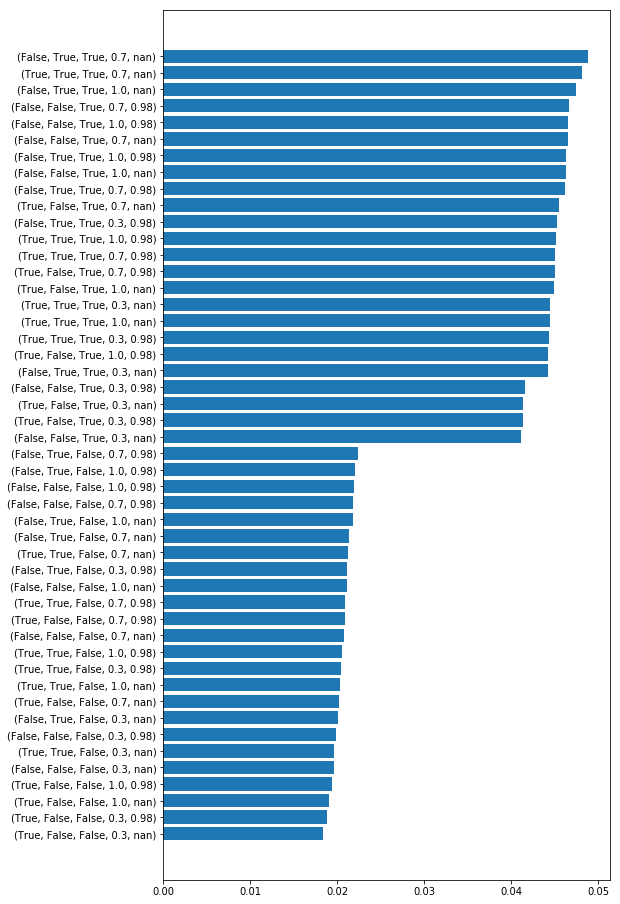

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))

ax.barh(range(Xdf.shape[0]), Xdf[model_column].sort_values())
ax.set_yticks(range(Xdf.shape[0]))
ax.set_yticklabels(Xdf[model_column].sort_values().index)

fig.show()

Now we know the best preparation code for SVR is also `TFF03N`.

In [105]:
best_svr_CV.best_params_

{'C': 0.01, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'linear'}

Now we can fine tune this model.

In [106]:
X, Xval = Xdct[(True, False, False, 0.3, None)]

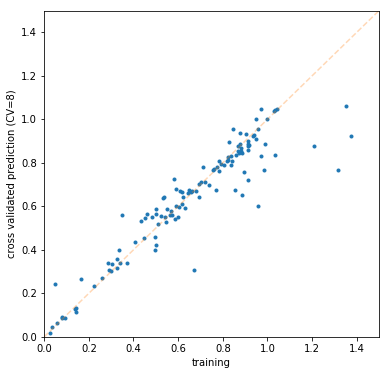

In [107]:
plot_train_pred(y, best_svr_CV.predict(X), lim)

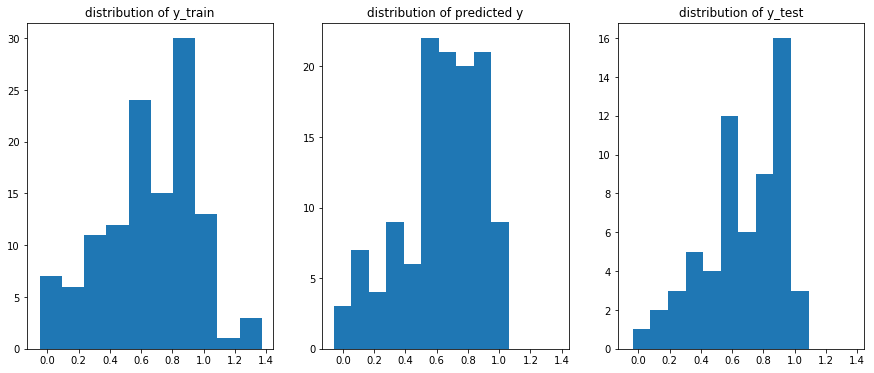

In [108]:
plot_pred_distribution(y, best_svr_CV.predict(X), best_svr_CV.predict(Xval))

In [109]:
pd.DataFrame(
    best_svr_CV.predict(Xval), 
    index=X_test.droplevel('Organism Code').index, 
    columns=['pred'], 
    dtype='float'
).to_csv('../output/performance_TFF03N_svr.csv')

In [110]:
joblib.dump(best_svr_CV.best_estimator_, '../models/performance_TFF03N_svr.pkl')

['../models/performance_TFF03N_svr.pkl']

There must be something unidentified to properly predict larger y.

When the final data arrives, use the `make_prep_pipeline` with specified parameter to prepare data, and then use the saved model to predict. 

For now let's call it a day. 